# Decision Tree Modelling

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# %matplotlib inline will make your plot outputs appear and be stored within the notebook.

In [2]:
# Set Display parameters
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [3]:
# Set Working directory
os.chdir(r'C:\Users\SHALESH\Desktop\UC Module - 3 Week 5\Assignment- 5')

In [4]:
# Get List of files in working directory 
os.listdir()

['Assignment 5 Decision Trees.pdf',
 'bill_authentication.csv',
 'Decision Tree Notes.txt',
 'petrol_consumption.csv']

## Question - 1 (Prediction of gas consumption)

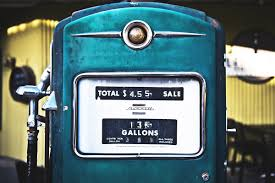

In [5]:
# Read the first dataset
data=pd.read_csv("petrol_consumption.csv",na_values=[""," ","NA","N/A"])

In [6]:
data.head()
# one row corresponds to a state

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


### Data Dictionary

- For one year, the consumption of petrol was measured in 48 states.
- The relevant variables are the petrol tax, the per capita
- income, the number of miles of paved highway, and
- the proportion of the population with driver's licenses.
- Petrol tax (cents per gallon)

There are 48 rows of data. The data include:
-  the petrol tax;
-  the per capita income; Average income (dollars)
-  the number of miles of paved highway;Paved Highways (miles)
-  the proportion of drivers; Proportion of population with driver's licenses
-  the consumption of petrol. Consumption of petrol (millions of gallons)

In [7]:
data.shape

(48, 5)

In [8]:
# lower the case of column names 
data.columns = map(str.lower, data.columns)  
print(list(data.columns))

['petrol_tax', 'average_income', 'paved_highways', 'population_driver_licence(%)', 'petrol_consumption']


In [9]:
list(data.columns)

['petrol_tax',
 'average_income',
 'paved_highways',
 'population_driver_licence(%)',
 'petrol_consumption']

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   petrol_tax                    48 non-null     float64
 1   average_income                48 non-null     int64  
 2   paved_highways                48 non-null     int64  
 3   population_driver_licence(%)  48 non-null     float64
 4   petrol_consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [11]:
print(data.isnull().sum())
print('')
print(data.isnull().sum().sum())  

petrol_tax                      0
average_income                  0
paved_highways                  0
population_driver_licence(%)    0
petrol_consumption              0
dtype: int64

0


In [12]:
### Get Descriptive statistics for clustering data
data.describe()  

,petrol_tax,average_income,paved_highways,population_driver_licence(%),petrol_consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


###### <font color=red> <b><u><i> Insights: -
  - <i><font color=red>  Range of mean paved_highways is 431-17,782 miles</font> </i>
  - <i><font color=red>  Avg. of income ranges 3063 to 5342 (USD)</font> </i> 
  - <i><font color=red>  Avg. petrol consumption is 576 (USD)</font> </i>
    </i></u></b> </font>




In [13]:
# Make a copy of original data
datac=data.copy()
datac.shape

(48, 5)

## Regression using Decision Tree Model

#### 1. Fit Decision Tree model to predict petrol consumption

In [14]:
## Divide into train and test datasets
from sklearn.model_selection import train_test_split

In [15]:
# Code for splitting the data into train and test splits 
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics

X = datac[['petrol_tax', 'average_income', 'paved_highways', 'population_driver_licence(%)']]
y = datac['petrol_consumption']

X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.25,random_state=200)

In [16]:
# Use Decisiontreeregressor class for creating decision tree on training set
from sklearn.tree import DecisionTreeRegressor

In [17]:
tree = DecisionTreeRegressor(max_depth=2)

In [18]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [19]:
# Make predictions and evaluate output.
predictions = tree.predict(X_test)

In [20]:
# Check the top 5 predictions and actual values

# predicted values
predictions[:5]

array([592.15, 592.15, 592.15, 592.15, 592.15])

In [21]:
# actual values
y_test[:5]

30    571
31    554
29    534
37    704
17    714
Name: petrol_consumption, dtype: int64

##### Reported model evaluation metrics for regression decision tree model 

In [22]:
# We see that the predictions are not accurate. Let's evaluate the prediction accuracy.
from sklearn.metrics import mean_absolute_error, r2_score

In [23]:
# MAE 
mean_absolute_error(y_test, predictions) # actual vs predicted

54.51794871794871

In [24]:
# R-Square
r2_score(y_test, predictions)  # actual vs predicted

0.48488149618237164

In [25]:
from sklearn.tree import export_graphviz

In [26]:
dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=X.columns, out_file=None)

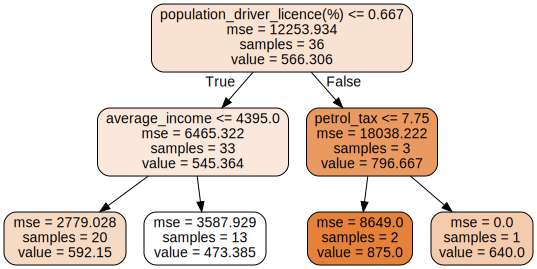

In [27]:
# Draw Decision tree with depth of two
import graphviz
graphviz.Source(dot_data)

###### <font color=blue> <b><u><i> Insights from the Decision Tree:-
  - <i><font color=blue> The MSE evaluation metric for population_driver_licence feature is ~12k</font> </i>
  - <i><font color=blue> There are more states with average Income<=4k compared with the petrol tax<=7 </font> </i> 
  - <i><font color=blue> The MSE evaluation metric for petrol tax is 18k </font> </i>
  - <i><font color=blue> States with population driver license proportion < 66% and petrol_tax<7 USD has average petrol consumption of 875 millions of gallon </font> </i> 
    </i></u></b> </font>

In [28]:
import numpy as np
np.unique(predictions)

array([473.38461538, 592.15      , 875.        ])

In [29]:
from pydotplus import graph_from_dot_data
graph = graph_from_dot_data(dot_data)

In [30]:
# Import and save the image to the directory folder
graph.write_png("Regressor_tree1.png")

True

#### 2. HYPER-PARAMETER TUNING: Use Grid Search to find the optimal value for the hyperparameters

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

##### Hyperparameter tuning with GridSearchCV

In [34]:
# fitting the model to max depth=6
param_grid = {"criterion": ["mse", "mae"],
              "splitter": ["best"],
              "max_depth": [2,3,4,5,6],
              "min_samples_split": [10, 20, 40],
              "min_samples_leaf": [20, 40, 100],
              "max_features": [2,3,4],
              "max_leaf_nodes": [2,5,20,100]
              }

grid_cv_dtm = GridSearchCV(tree, param_grid, cv=10)
grid_cv_dtm.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(max_depth=2),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [2, 3, 4],
                         'max_leaf_nodes': [2, 5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 40],
                         'splitter': ['best']})

In [35]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::-0.552571819485853
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 2, 'max_features': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 20, 'min_samples_split': 10, 'splitter': 'best'}


###### <font color=red> <b><u><i> Insights from the Hyper-Parameter Tuning:-
  - <i><font color=red> Most Optimal Decision tree model has depth of two levels and features utilised for tree pruning is 2</font> </i>
  - <i><font color=red> Minimum records required for splitting is 10 with splitting stopping criteria as lowest MSE </font> </i> 
    </i></u></b> </font>

In [36]:
import pandas as pd
df = pd.DataFrame(data=grid_cv_dtm.cv_results_)
df.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003595,0.000664,0.002098,0.000536,mse,2,2,2,20,10,best,"{'criterion': 'mse', 'max_depth': 2, 'max_feat...",-0.146518,-0.001484,-2.064199,-0.182189,-0.184514,-0.526868,-0.002855,-0.579336,-0.280021,-1.557733,-0.552572,0.664413,1
1,0.002793,0.001076,0.001998,0.000638,mse,2,2,2,20,20,best,"{'criterion': 'mse', 'max_depth': 2, 'max_feat...",-0.146518,-0.001484,-2.064199,-0.182189,-0.184514,-0.526868,-0.002855,-0.579336,-0.280021,-1.557733,-0.552572,0.664413,1
2,0.002401,0.000498,0.001691,0.000631,mse,2,2,2,20,40,best,"{'criterion': 'mse', 'max_depth': 2, 'max_feat...",-0.146518,-0.001484,-2.064199,-0.182189,-0.184514,-0.526868,-0.002855,-0.579336,-0.280021,-1.557733,-0.552572,0.664413,1


In [37]:
df['param_max_depth'].value_counts()

6    216
5    216
4    216
3    216
2    216
Name: param_max_depth, dtype: int64

 #### 3. Use Grid Search to find the optimal value for the hyperparameters

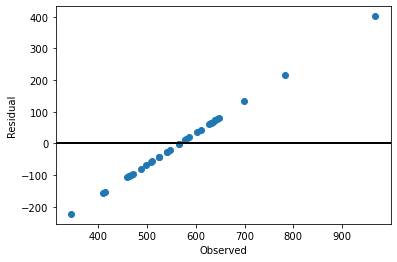

In [38]:
# Evaluating training model
predicted = grid_cv_dtm.best_estimator_.predict(X_train)
residuals = y_train.values.flatten()-predicted

fig, ax = plt.subplots()
ax.scatter(y_train.values.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [39]:
# Checking the training model scores
from sklearn.model_selection import cross_val_score

r2_scores = cross_val_score(grid_cv_dtm.best_estimator_, X_train, y_train, cv=10)
mse_scores = cross_val_score(grid_cv_dtm.best_estimator_, X_train, y_train, cv=10,scoring='neg_mean_squared_error')

print("avg R-squared::{:.3f}".format(np.mean(r2_scores)))
print("MSE::{:.3f}".format(np.mean(mse_scores)))

avg R-squared::-0.553
MSE::-12117.211


In [40]:
# Checking the test model scores
from sklearn.metrics import mean_squared_error

best_dtm_model = grid_cv_dtm.best_estimator_

y_pred = best_dtm_model.predict(X_test)
residuals = y_test.values.flatten() - y_pred

r2_score = best_dtm_model.score(X_test,y_test)
print("R-squared:{:.3f}".format(r2_score))
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))

R-squared:-0.160
MSE: 12706.82


###### <font color=red> <b><u><i> What does the negative R-square value signify here?
  - <i><font color=red> For train dataset, r-square (-0.55) is more negative when fitted the decision tree model with hyper-parameter tuning </font> </i>
  - <i><font color=red> For test dataset, r-square (-0.16) is less negative when fitted the decision tree model with hyper-parameter tuning </font> </i> 
    </i></u></b> </font>

#### 4. Refinement of Decision tree model based on Best Hyperparameter tuning to improve rsquare metric

In [41]:
## Refit Decision tree model based on Best Hyperparameters::
tree2 = DecisionTreeRegressor(criterion='mse',max_depth=2,max_features=2,min_samples_leaf=4,min_samples_split=18,random_state=1234)

tree2.fit(X_train, y_train)
predictions = tree2.predict(X_test)

In [42]:
# We see that the predictions are not accurate. Let's evaluate the prediction accuracy.
from sklearn.metrics import mean_absolute_error, r2_score

In [43]:
# MAE 
mean_absolute_error(y_test, predictions) # actual vs predicted

55.86111111111111

In [44]:
# R-Square
r2_score(y_test, predictions)  # actual vs predicted

0.5281684928026302

In [45]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree2, filled=True, rounded=True, feature_names=X.columns, out_file=None)

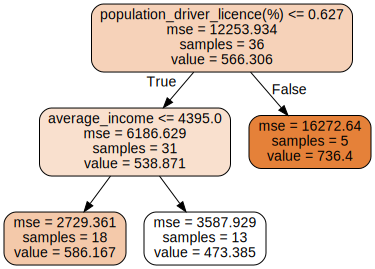

In [46]:
# Draw Decision tree with depth of two
import graphviz
graphviz.Source(dot_data)

In [47]:
# Import and save the final tree in the original directory
from pydotplus import graph_from_dot_data
graph = graph_from_dot_data(dot_data)

graph.write_png("Regressor_tree_final.png")

True

#### 5. Refit the Final Decision tree model based on Best Hyperparameters & Best Features to improve model r-square and error

##### Evaluate Final Decision Tree model (based on various key metrics)

In [52]:
# Fit the Decision tree model
tree3 = DecisionTreeRegressor(max_depth=6,
                           min_samples_split=5,
                           max_leaf_nodes=10,
                           random_state=5678)

In [53]:
tree3.fit(X_train, y_train)
print("R-Squared on train dataset={}".format(tree3.score(X_train,y_train)))

tree3.fit(X_test,y_test)   
print("R-Squared on test dataset={}".format(tree3.score(X_test,y_test)))

R-Squared on train dataset=0.8334723056634809
R-Squared on test dataset=0.9501877721174254


In [54]:
# Predict final tree model on test dataset
predictions = tree3.predict(X_test)

In [55]:
# MAE 
mean_absolute_error(y_test, predictions) # actual vs predicted

19.5

In [56]:
# R-Square
r2_score(y_test, predictions)  # actual vs predicted

0.9501877721174254

In [57]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree3, filled=True, rounded=True, feature_names=X.columns, out_file=None)

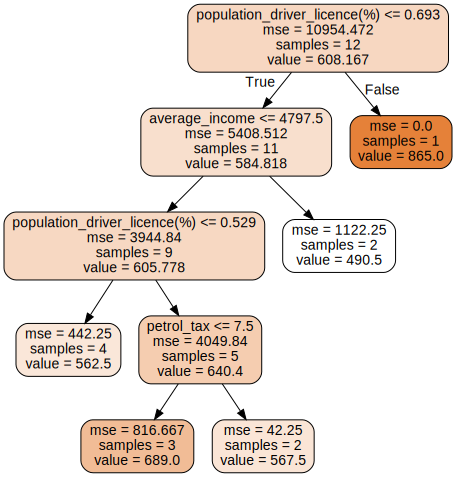

In [58]:
# Draw Decision tree diagram 
import graphviz
graphviz.Source(dot_data)  

## Final predictions about the gas consumption from the best fit decision tree: -

- States with Driver license proportion > 70% have avg. predicted petrol consumption of 865 millions of gallon
- States with Driver license proportion < 70% and avg. income < 4k USD and petrol_tax< 7.5 cents per gallon have avg. predicted petrol consumption of 689 millions of gallon 
- States with Driver license proportion < 50% and avg. income < 4k USD and petrol_tax> 7.5 cents per gallon have avg. predicted petrol consumption of 640 millions of gallon 

In [59]:
tree3.get_params

<bound method BaseEstimator.get_params of DecisionTreeRegressor(max_depth=6, max_leaf_nodes=10, min_samples_split=5,
                      random_state=5678)>

In [60]:
print(tree3.feature_importances_)

[0.14182463 0.17409603 0.         0.68407934]


In [61]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error (MSE)
print("Mean squared error: %.2f"% mean_squared_error(y_test, predictions))

Mean squared error: 545.67


In [62]:
# Explained variance score (R-Square): 1 is perfect prediction  
print('Test Variance score: %.2f' % r2_score(y_test, predictions))

Test Variance score: 0.95


## Question-2 (Prediction of fake or authentic bank note)

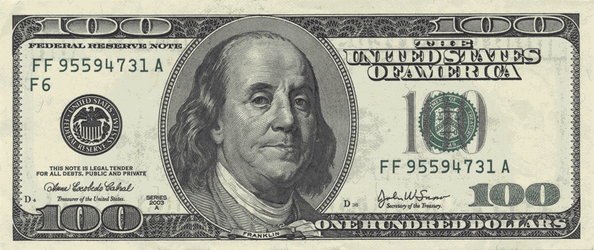

In [63]:
# Pull data for bill authentication (Each record contains info about each note)
data1=pd.read_csv("bill_authentication.csv",na_values=[""," ","NA","N/A"])

In [64]:
# lower the case of column names 
data1.columns = map(str.lower, data1.columns)  
print(list(data1.columns))

['variance', 'skewness', 'curtosis', 'entropy', 'class']


In [65]:
data1.head()    

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Data Dictionary:-

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.
- Attribute Information:
 1. variance of Wavelet Transformed image (continuous)
 2. skewness of Wavelet Transformed image (continuous)
 3. curtosis of Wavelet Transformed image (continuous)
 4. entropy of image (continuous)
 5. class (integer)

In [66]:
data1.shape

(1372, 5)

In [67]:
list(data1.columns) ## Weekday data (04Jan2010-29Oct2013) ~ 4 yrs   

['variance', 'skewness', 'curtosis', 'entropy', 'class']

In [68]:
### 
data1.dtypes  

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [69]:
data1['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [70]:
data1['class'].value_counts(normalize=True)

0    0.555394
1    0.444606
Name: class, dtype: float64

In [71]:
### 
print(data1.isnull().sum().sum())  

0


In [72]:
# Make a copy of original data
data1c=data1.copy()
data1c.shape

(1372, 5)

In [73]:
# Split the data into train and test sets.
from sklearn.model_selection import train_test_split

In [74]:
# Code for splitting the data into train and test splits 
import sklearn.model_selection as model_selection

X = data1c[['variance', 'skewness', 'curtosis', 'entropy']]
y = data1c['class']

X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.25,random_state=200)

#### 1. Fit the Final Decision tree model to predict whether a bank note is fake or real

In [75]:
# Import Decision Tree Classifier and fit the model to the training data.
from sklearn.tree import DecisionTreeClassifier

In [76]:
# Make the tree with the required depth
tree4 = DecisionTreeClassifier(max_depth=3)

In [77]:
import numpy as np
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import utils

In [78]:
# fit 
tree4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [79]:
# Check the top 5 predictions and actual values.
predictions = tree4.predict(X_test)

In [80]:
predictions[:5]

array([0, 1, 1, 0, 0], dtype=int64)

In [81]:
y_test[:5]

96      0
983     1
956     1
577     0
1352    1
Name: class, dtype: int64

### Model Evaluation metrics for Decision Tree Classifier model 

In [83]:
# We see that the predictions are pretty accurate. Let's evaluate the prediction accuracy.
from sklearn.metrics import accuracy_score, confusion_matrix

In [84]:
# To check the accuracy score of the model
accuracy_score(y_test, predictions)

0.9446064139941691

In [85]:
# To check correct predictions
accuracy_score(y_test, predictions, normalize=False)

324

In [86]:
confusion_mat = confusion_matrix(y_test, predictions) # actual vs predicted
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'],\
                            columns=['Predicted neg','Predicted pos'])

In [87]:
# To plot a confusion matrix
confusion_df

,Predicted neg,Predicted pos
Actual neg,185,10
Actual pos,9,139


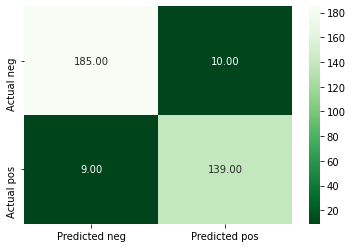

In [88]:
# To make a heatmap of the confusion matrix
cf_=sns.heatmap(confusion_df, cmap='Greens_r', annot=True,fmt='.2f')

In [89]:
type(cf_)

matplotlib.axes._subplots.AxesSubplot

In [90]:
from sklearn.tree import export_graphviz
import graphviz

In [91]:
y=pd.DataFrame(y)

In [92]:
dot_data = export_graphviz(tree4, filled=True, rounded=True, feature_names=X.columns,out_file=None,precision=2)

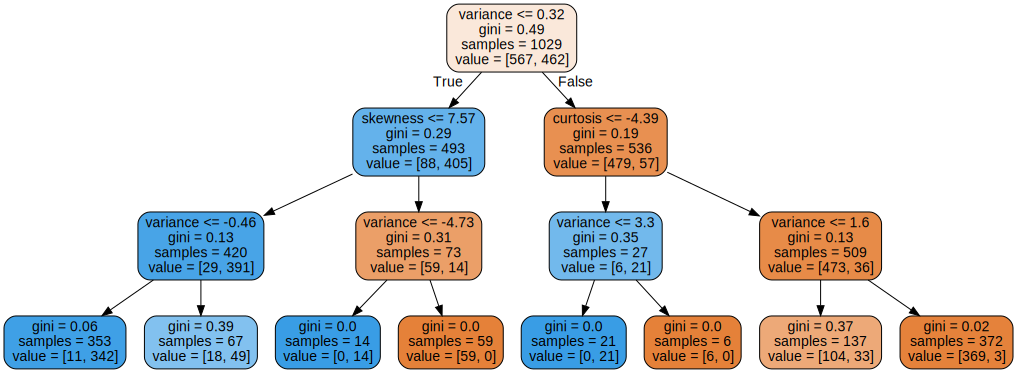

In [93]:
graph=graphviz.Source(dot_data)
graph

###### <font color=red> <b><u><i> Insights from the Initial Classification Decision Tree Model :-
- <i><font color=red> Depth-0: Bank Notes with Variance <= 0.32 have predicted values as 88 & 405 with its gini value being 0.29 </font> </i>
- <i><font color=red> Depth-2: Bank Notes with cutoff for variance column <= -0.46 has pure leaf node with  gini(0.06) and the other impure leaf node with gini(0.39).</font> </i> 
- <i><font color=red>Depth-2: Bank Notes with the variance <-4.73 have both the leaf nodes being pure as gini=0</font> </i> 
- <i><font color=red>Depth-0: Bank Notes with the variance >= 0.32 have curtosis as the first internal node (curtosis<-4.39) with skewness feature (7.33) of the note as having 2 pure gini leaves </font> </i> 
- <i><font color=red>Depth-2: Bank Notes with the variance >= 1.6 has more pure leaf node as compared with variance < 1.6 </font> </i>     
    </i></u></b> </font>

In [94]:
# export decision tree to PDF file 
graph.render("DT_Classifier_Initial",view = True)

'DT_Classifier_Initial.pdf'

In [95]:
from pydotplus import graph_from_dot_data

In [96]:
graph = graph_from_dot_data(dot_data)

In [97]:
# To save the decision classifier tree in png format 
graph.write_png("Classifier_tree.png")

True

### Feature Importance from Final Decision Tree Classifier Model

In [149]:
from sklearn.model_selection import cross_validate, ShuffleSplit, GridSearchCV
base_results = cross_validate(tree4, X, y, cv=5, return_train_score=True)

In [150]:
def plot_feature_importances(df):
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

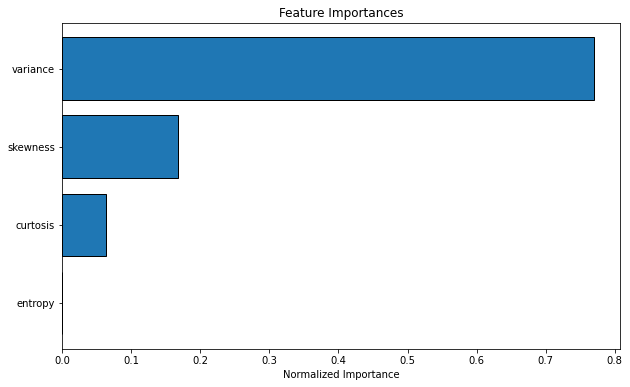

In [151]:
importance = tree4.feature_importances_
feature = X.columns
fi = pd.DataFrame()
fi['importance'] = importance
fi['feature'] = feature
fi_sorted = plot_feature_importances(fi)

###### <font color=red> <b><u><i> Best Features from the Final Classification Decision Tree Model :-
- <i><font color=red> 76% of variable importance is contributed by variance and rest 24% by curtosis, skewness and entropy </font> </i>
    </i></u></b> </font>

#### 2 .Perform Hyper-parameter tuning for decision tree classifier model 

The parameters important for tuning are:

- 'criterion': gini or entropy - measure of impurity (can be treated as a loss function)
- 'splitter': best or random - methodology to select the next feature to split on
- 'max_depth': maximum height to restrict the growth of the tree beyond certain point (to avoid overfitting sometimes)
- 'min_samples_split': minimum number of samples at a node required to split

#### Early Stopping in Decision Trees -
- Decision tree grows by splitting the data based on the selected feature/variable (nodes in terms of trees), but a big question arises while implementing the trees that when should we stop. One answer to this question is Early Stopping. The tree grows in such a manner so as to minimize the loss function or the error by recursively splitting the variables, but at some point, the improvement in the error is not significant, then we can stop. This stopping is called as early stopping.

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

### Hyperparameter tuning with GridSearchCV

In [100]:
param_grid = {"criterion": ["gini", "entropy"],
              "splitter": ["best"],
              "max_depth": [2,3,4,5,6,7,8],
              "min_samples_split": [2,5,10,20,40],
              "min_samples_leaf": [1,2,5,10,20,40,100],
              "max_features": [2,3,4],
              "max_leaf_nodes": [2,5,10,20,100]
              }
       
grid_cv_dtm = GridSearchCV(tree4, param_grid, cv=10)
grid_cv_dtm.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': [2, 3, 4],
                         'max_leaf_nodes': [2, 5, 10, 20, 100],
                         'min_samples_leaf': [1, 2, 5, 10, 20, 40, 100],
                         'min_samples_split': [2, 5, 10, 20, 40],
                         'splitter': ['best']})

In [101]:
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

Best Hyperparameters::
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 3, 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


###### <font color=red> <b><u><i> Insights from the Hyper-Parameter Tuning of Decision Tree Classifier model:-
  - <i><font color=red> Most Optimal Decision tree model has depth of 8 levels and features utilised for tree pruning is 2</font> </i>
  - <i><font color=red> Minimum records required for splitting is 2 with splitting stopping criteria as Entropy </font> </i> 
    </i></u></b> </font>

In [102]:
import pandas as pd
df = pd.DataFrame(data=grid_cv_dtm.cv_results_)
df.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003184,0.000872,0.002002,0.000447,gini,2,2,2,1,2,best,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.834951,0.84466,0.679612,0.912621,0.844660,0.737864,0.621359,0.689320,0.737864,0.843137,0.774605,0.089266,6991
1,0.002987,0.001093,0.001897,0.000540,gini,2,2,2,1,5,best,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.718447,0.84466,0.834951,0.650485,0.844660,0.883495,0.834951,0.834951,0.834951,0.843137,0.812469,0.067200,6529
2,0.004987,0.004699,0.002094,0.000698,gini,2,2,2,1,10,best,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.718447,0.84466,0.834951,0.912621,0.699029,0.883495,0.640777,0.834951,0.834951,0.843137,0.804702,0.083158,6642


In [103]:
df['param_criterion'].value_counts()

gini       3675
entropy    3675
Name: param_criterion, dtype: int64

 #### 3. Use Grid Search to find the optimal value for the hyperparameters

[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

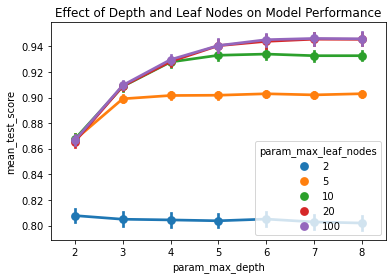

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt  

fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

###### <font color=blue> <b><u><i> Insights from the Hyper-Parameter Tuning of Decision Tree Classifier model:-
  - <i><font color=blue> The test score improves with depth > 5 and max leaf nodes > 10 </font> </i>
    </i></u></b> </font>

In [105]:
clf = grid_cv_dtm.best_estimator_
clf

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=3,
                       max_leaf_nodes=20)

In [106]:
# Accuracy rate 
grid_cv_dtm.best_score_

0.9902817437654674

In [107]:
grid_cv_dtm.classes_

array([0, 1], dtype=int64)

In [108]:
grid_cv_dtm.get_params 

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'max_features': [2, 3, 4],
                         'max_leaf_nodes': [2, 5, 10, 20, 100],
                         'min_samples_leaf': [1, 2, 5, 10, 20, 40, 100],
                         'min_samples_split': [2, 5, 10, 20, 40],
                         'splitter': ['best']})>

In [109]:
params = grid_cv_dtm.best_params_
params

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 3,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

#### 4. Refinement of Decision tree model based on Best Hyperparameter tuning to improve rsquare metric

In [110]:
## Refit Decision tree model based on Best Hyperparameters::

tree5 = DecisionTreeClassifier(criterion='entropy',max_depth=8,max_features=2,min_samples_leaf=5,min_samples_split=2,max_leaf_nodes=100,random_state=1234)

tree5.fit(X_train, y_train)
predictions = tree5.predict(X_test)

In [111]:
predictions[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [112]:
y_test[:5]

96      0
983     1
956     1
577     0
1352    1
Name: class, dtype: int64

<b> Evaluate Decision Tree Classifier Model Performance </b>

In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [114]:
# Accuracy rate   
accuracy_score(y_test, predictions)

0.9941690962099126

In [115]:
# Classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       195
           1       0.99      1.00      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [116]:
# To check correct predictions
accuracy_score(y_test, predictions, normalize=False)

341

In [117]:
confusion_mat = confusion_matrix(y_test, predictions) # actual vs predicted
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'],\
                            columns=['Predicted neg','Predicted pos'])

In [118]:
# To plot a confusion matrix
confusion_df

,Predicted neg,Predicted pos
Actual neg,193,2
Actual pos,0,148


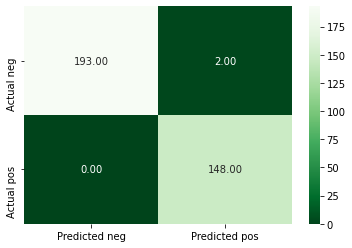

In [119]:
# To make a heatmap of the confusion matrix
cf_=sns.heatmap(confusion_df, cmap='Greens_r', annot=True,fmt='.2f')

In [120]:
type(cf_)

matplotlib.axes._subplots.AxesSubplot

In [121]:
from sklearn.tree import export_graphviz
import graphviz

In [122]:
dot_data = export_graphviz(tree5, filled=True, rounded=True, feature_names=X.columns,out_file=None,precision=2)

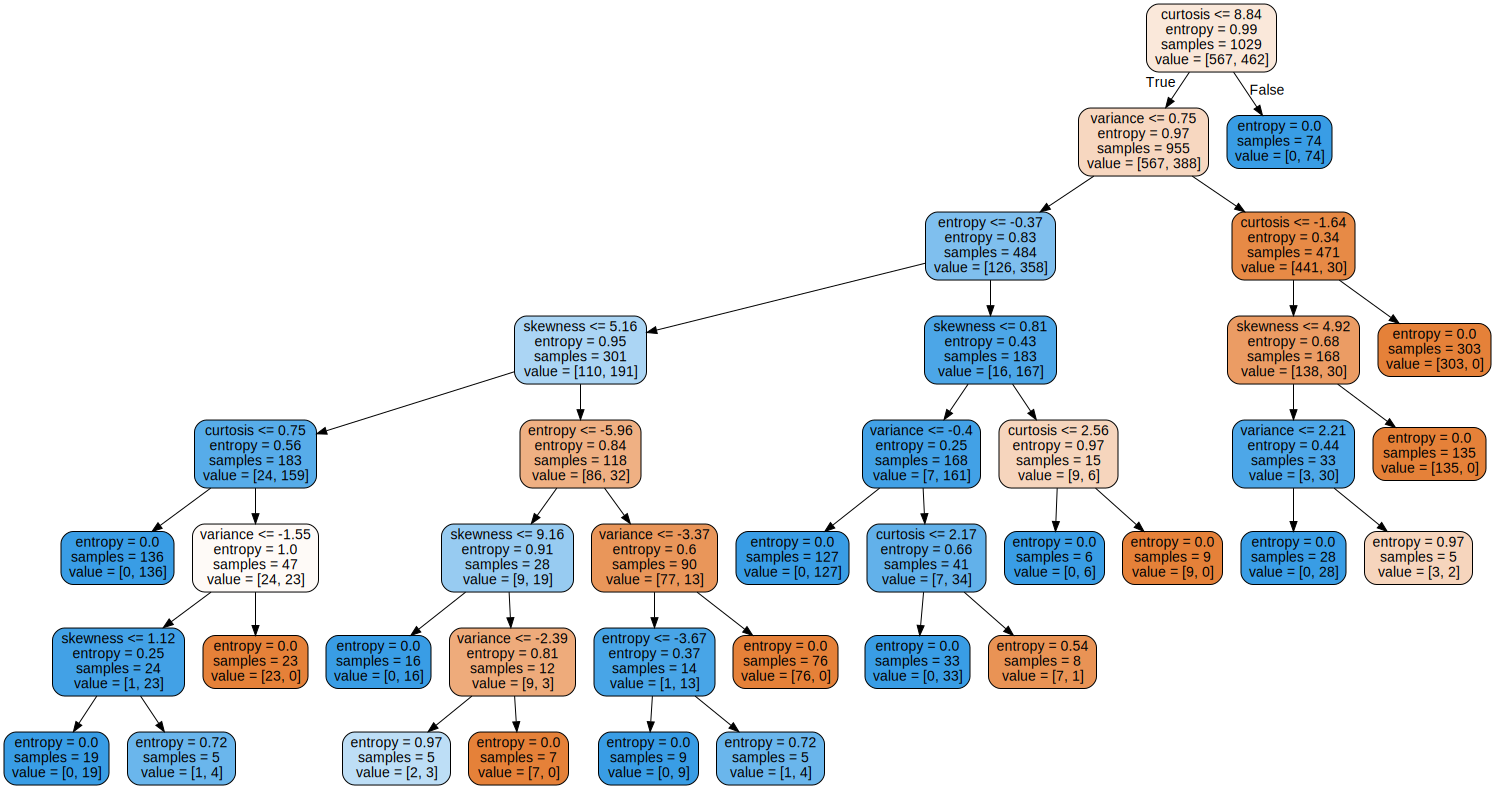

In [123]:
graph=graphviz.Source(dot_data)
graph

### Insights from the Final Classification Decision Tree Model :-
Depth-0: Bank Notes with Curtosis <=8.84 and entropy < -0.37 and skewness < 5.16 have predicted values as 110 (1) & 191 (0) with its entropy value as 0.95

In [124]:
# export decision tree to PDF file 
graph.render("DT_Classifier_2",view = True)

'DT_Classifier_2.pdf'

In [125]:
from pydotplus import graph_from_dot_data

In [126]:
graph = graph_from_dot_data(dot_data)

In [127]:
# To save the decision classifier tree in png format 
graph.write_png("Classifier_tree2.png")

True

#### 5. Refit the Final Decision tree classification model based on Best Hyperparameters & Best Features to improve model accuracy

In [128]:
## Refit Decision tree model based on Best Hyperparameters::

tree6 = DecisionTreeClassifier(criterion='entropy',max_depth=9,max_features=2,min_samples_leaf=5,min_samples_split=2,max_leaf_nodes=400,random_state=1234)

tree6.fit(X_train, y_train)
predictions = tree6.predict(X_test)

In [129]:
predictions[:5]

array([0, 1, 1, 0, 1], dtype=int64)

In [130]:
y_test[:5]

96      0
983     1
956     1
577     0
1352    1
Name: class, dtype: int64

<b> Evaluate Decision Tree Classifier Model Performance </b>

In [131]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [132]:
# Accuracy rate   
acc_dt = round( metrics.accuracy_score(y_test, predictions) * 100, 2 )
print( 'Accuracy of Decision Tree model : ', acc_dt )

Accuracy of Decision Tree model :  99.42


###### <font color=red> <b><u><i> Insights from the Final Refined Classification Decision Tree Model from Hyperparameter tuning and more optimal parameters :-
- <i><font color=red> Slightly higher accuracy is achieved in the final refined model with accuracy of 99.42% compared with previous model iteration of accuracy rate of 99.41%</font> </i>
    </i></u></b> </font>

In [133]:
# Classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       195
           1       0.99      1.00      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [134]:
# To check correct predictions
accuracy_score(y_test, predictions, normalize=False)

341

In [135]:
confusion_mat = confusion_matrix(y_test, predictions) # actual vs predicted
confusion_df = pd.DataFrame(confusion_mat, index=['Actual neg','Actual pos'],\
                            columns=['Predicted neg','Predicted pos'])

In [136]:
# To plot a confusion matrix
confusion_df

,Predicted neg,Predicted pos
Actual neg,193,2
Actual pos,0,148


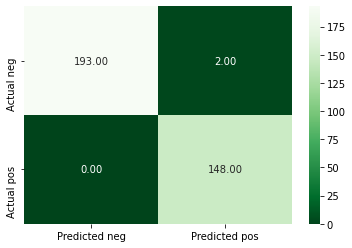

In [137]:
# To make a heatmap of the confusion matrix
cf_=sns.heatmap(confusion_df, cmap='Greens_r', annot=True,fmt='.2f')

In [138]:
type(cf_)

matplotlib.axes._subplots.AxesSubplot

In [139]:
from sklearn.tree import export_graphviz
import graphviz

In [140]:
dot_data = export_graphviz(tree6, filled=True, rounded=True, feature_names=X.columns,out_file=None,precision=2)

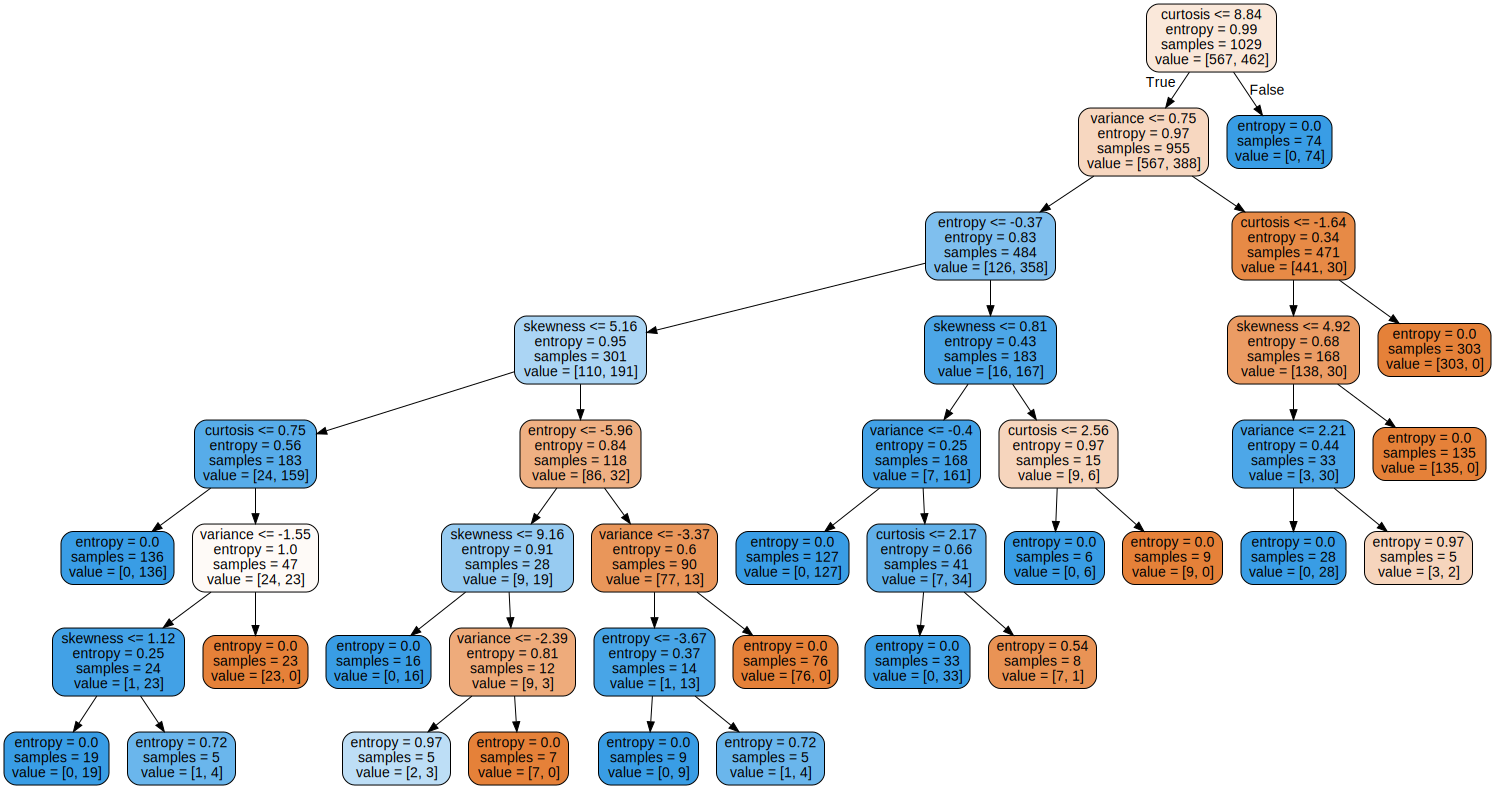

In [141]:
graph=graphviz.Source(dot_data)
graph

## Predictions about the fake or authentic note based upon the classifier decision tree: -
- Depth-0: Bank Notes with Curtosis <=8.84 and entropy < -0.37 and skewness < 5.16 have predicted values as 110 (1) & 191 (0) with its entropy value as 0.95
- The last model iteration is the best because it use optimal no of features (variance, skewness and entropy) in our case with deeper tree depth and higher quantity of max_leaf_nodes 

In [142]:
# export decision tree to PDF file 
graph.render("DT_Classifier_3",view = True)

'DT_Classifier_3.pdf'

In [143]:
from pydotplus import graph_from_dot_data

In [144]:
graph = graph_from_dot_data(dot_data)

In [145]:
# To save the decision classifier tree in png format 
graph.write_png("Classifier_tree3.png")

True

In [152]:
from sklearn.model_selection import cross_validate, ShuffleSplit, GridSearchCV
base_results = cross_validate(tree6, X, y, cv=5, return_train_score=True)

In [153]:
def plot_feature_importances(df):
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

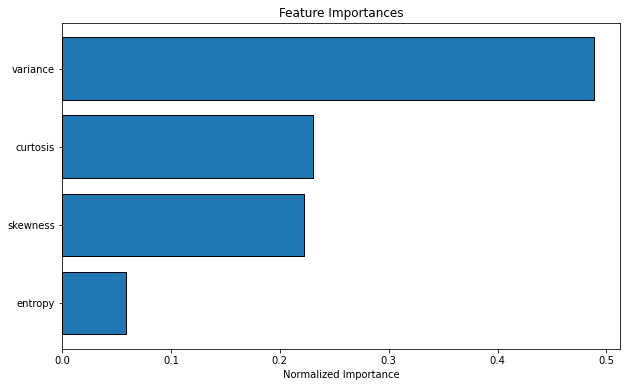

In [154]:
importance = tree6.feature_importances_
feature = X.columns
fi = pd.DataFrame()
fi['importance'] = importance
fi['feature'] = feature
fi_sorted = plot_feature_importances(fi)

#### <font color=red> <b><u><i> Best Features from the Final Classification Decision Tree Model :-
- <i><font color=red> The feature importance after the best fit model has changed and hence their level of significance matters a lot more than in the original model. </font> </i>
- <i><font color=red> 50% of variable importance is contributed by variance and remaining 50% by curtosis, skewness and entropy </font> </i>
    </i></u></b> </font>

### References used for Decision tree regressor:-
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html